<a href="https://colab.research.google.com/github/gangadharnitw/Reinforcement-Learning/blob/main/RL01_K_Armed_Bandit_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Armed Bandit Problem

You are faced repeatedly with a choice among k different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections or time steps.


### Problem Setup

* In a **k-armed bandit** problem:

  * You have $k$ actions (like slot machines or levers).
  * Each action $a$ has an **expected reward** $q_*(a)$, which is unknown.
  * At time step $t$, the selected action is $A_t$ and the reward is $R_t$.
  * The goal is to maximize total reward over time.

* The true value of action $a$ is defined as:

  $$
  q_*(a) \doteq \mathbb{E}[R_t \mid A_t = a]
  $$


### 🧠 Key Concepts

- #### 1. **Estimated Value**

  * Since $q_*(a)$ is unknown, we estimate it:

  $$
  Q_t(a) \approx q_*(a)
  $$
  * $Q_t(a)$ is the agent’s best guess at time $t$ based on past rewards.

- #### 2. **Greedy Action**

  * The **greedy action** at any time step is the action with the **highest estimated value**.
  * Formally:

  $$
  A_t = \arg\max_a Q_t(a)
  $$

### ⚖️ Exploitation vs. Exploration

- #### 3. **Exploitation**

  * Choosing the **greedy action** (highest $Q_t(a)$) is called **exploiting**.
  * This maximizes **immediate** reward.

- #### 4. **Exploration**

  * Choosing **non-greedy actions** is called **exploring**.
  * Helps discover if other actions might actually be better than the current greedy one.


### 🔍 Why Exploration is Important

* You may think one action is best, but:

  * Other actions might be **just as good** or **better**, but haven't been tried enough.
  * There's **uncertainty** in your estimates.
* If you have many time steps ahead, exploration can lead to **better long-term performance**.


### ⚔️ The Conflict

* **You can't explore and exploit with the same action at the same time.**
* This trade-off is known as the **exploration–exploitation dilemma**.
* Balancing the two is essential in reinforcement learning.

# 1. Action-Value Method: Sample Average (Incremental computation)

- True value of an action is the mean reward when that action is selected. One natual way to estimate this, is by averaging the rewards actually rewards.
$$
Q_t(a) \doteq
\frac{\text{sum of rewards when } a \text{ taken prior to } t}
     {\text{number of times } a \text{ taken prior to } t}
=
\frac{\sum_{i=1}^{t-1} R_i \cdot \mathbb{1}_{A_i = a}}
     {\sum_{i=1}^{t-1} \mathbb{1}_{A_i = a}},
$$
  - where $\mathbb{1}_{predicate}$ denotes the random variable that is 1 if predicate is true and 0 if it is not


- Averages can be computed in computationally efficient manner with constant memory and constant per-time-step computation.

  - To simplify the notation, we concentrate on a single action.
  - Let $R_i$ denote the reward received after ith selection of this action. and,
  - Let $Q_n$ denote the estimate of its action value after it has been selected n-1 times.
  - We can write it as $Q_n \doteq \frac{R_1 + R_2 + \cdots + R_{n-1}}{n - 1}$
$$
\begin{aligned}
Q_{n+1}
&= \frac{1}{n} \sum_{i=1}^{n} R_i \\
&= \frac{1}{n} \left( R_n + \sum_{i=1}^{n-1} R_i \right) \\
&= \frac{1}{n} \left( R_n + (n - 1) \cdot \frac{1}{n - 1} \sum_{i=1}^{n-1} R_i \right) \\
&= \frac{1}{n} \left( R_n + (n - 1) Q_n \right) \\
&= \frac{1}{n} \left( R_n + n Q_n - Q_n \right) \\
&= Q_n + \frac{1}{n} \left[ R_n - Q_n \right]
\end{aligned}
$$
  - General form is $$\textit{NewEstimate} \leftarrow \textit{OldEstimate} + \textit{StepSize} \left[ \textit{Target} - \textit{OldEstimate} \right]$$
  - Stepsize in the derived equation is $\frac{1}{n}$. This stepsize value changes from time step to timestep as n changes. We will call stepsize as ⍺ going forward, more generally by $⍺_t$(a)

## Action Selection Rule

Simplest action selection rule is to select one of the actions with highest estimate value i.e greedy action. We write greedy action selection method as

$$A_t \doteq \arg\max_a Q_t(a)$$

where $argmax_a$ denotes the action a for which the expression that follows is maximized (with ties broken arbitrarily). Greedy action selection always exploits current knowledge to maximize immediate reward. It spends no time at all sampling apparently inferior actions to see if they might really be better.

**A simple alternative is to behave greedily most of the time, but every once in a while, say with small probability ε, select randomly from among all the actions with equal probability independent of action-value estimates. This is called ε-greedy method.**

## Simple Bandit Algorithm (ε-greedy)

**1. Initialize, for $a = 1$ to $k$:**

  - $Q(a) \leftarrow 0$
  - $N(a) \leftarrow 0$

**2. Loop forever**

- Choose action $A$:

$$
A \leftarrow
\begin{cases}
\arg\max_a Q(a) & \text{with probability } 1 - \varepsilon \quad \text{(breaking ties randomly)} \\
\text{a random action} & \text{with probability } \varepsilon
\end{cases}$$

- Observe reward:
$$R \leftarrow \text{bandit}(A)$$

- Update count:
$$N(A) \leftarrow N(A) + 1$$

- Update estimate:
$$Q(A) \leftarrow Q(A) + \frac{1}{N(A)} \left[ R - Q(A) \right]
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
k = 10 ## 10-armed bandit
# true_values = np.random.normal(loc=0, scale=1.0, size=k)

def run_simulation(epsilon, timesteps):

  true_values = np.random.normal(loc=0, scale=1.0, size=k)
  optimal_action = np.argmax(true_values)

  # Initialization
  Q = np.zeros(k)  # estimate values Q_t(a)
  N = np.zeros(k)  # number of times each action was selected
  rewards = np.zeros(timesteps)    # reward at each timestep
  optimal_action_selected = np.zeros(timesteps)

  for timestep in range(timesteps):
    # choose an action (ε-greedy)
    if np.random.rand() < epsilon: ## Exploration - Random selection
      action = np.random.choice(k)
    else: ## Exploitation - Greedy
      max_q = np.max(Q)
      best_actions = np.where(Q == max_q)[0] ## break ties randomly
      action = np.random.choice(best_actions)

    # simulate reward from bandit
    reward = np.random.normal(loc=true_values[action], scale=1.0)
    rewards[timestep] = reward
    optimal_action_selected[timestep] = (action == optimal_action)

    # update the estimates
    N[action] += 1
    Q[action] += (reward-Q[action])/N[action]

  return rewards, optimal_action_selected


def run_multiple_simulations(epsilon, timesteps, num_simulations):
  all_rewards = np.zeros((num_simulations, timesteps))
  all_optimal_actions = np.zeros((num_simulations, timesteps))
  for simulation in range(num_simulations):
    if simulation%10 == 0: print(f"Simulation:{simulation}")
    all_rewards[simulation], all_optimal_actions[simulation] = run_simulation(epsilon, timesteps)

  # calculate avg across simulations for each timestep
  avg_rewards = np.mean(all_rewards, axis=0)
  avg_optimal_actions = np.mean(all_optimal_actions, axis=0)*100
  return avg_rewards, avg_optimal_actions

In [ ]:
epsilon_0_rewards, epsilon_0_optimal_actions = run_multiple_simulations(epsilon=0, timesteps=1000, num_simulations=2000)
epsilon_001_rewards, epsilon_001_optimal_actions = run_multiple_simulations(epsilon=0.01, timesteps=1000, num_simulations=2000)
epsilon_01_rewards, epsilon_01_optimal_actions = run_multiple_simulations(epsilon=0.1, timesteps=1000, num_simulations=2000)

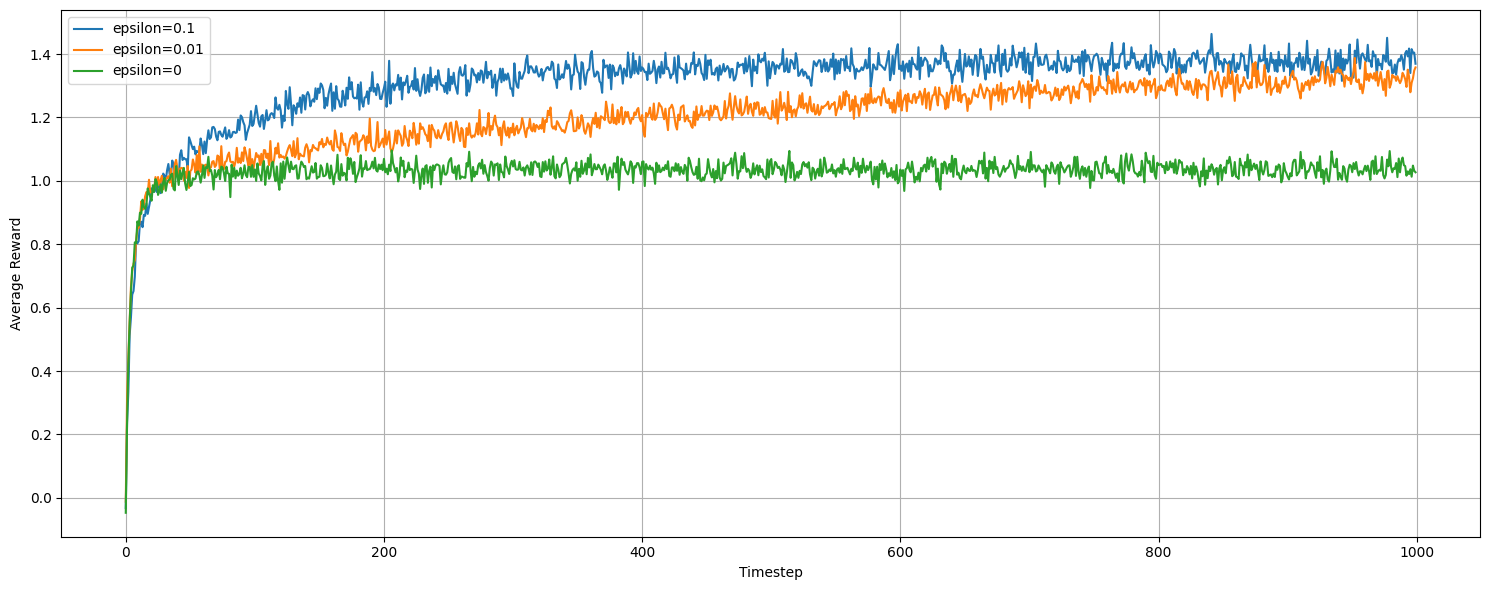

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(epsilon_01_rewards, label='epsilon=0.1')
plt.plot(epsilon_001_rewards, label='epsilon=0.01')
plt.plot(epsilon_0_rewards, label='epsilon=0')

plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

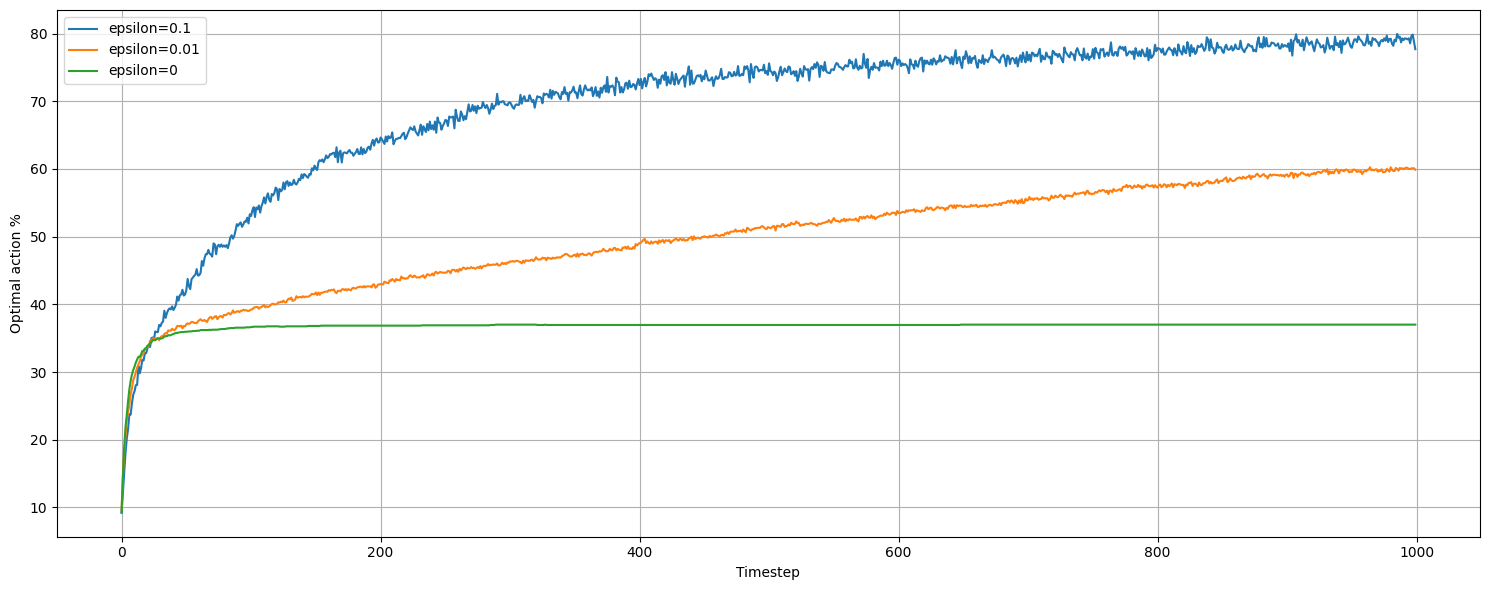

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(epsilon_01_optimal_actions, label='epsilon=0.1')
plt.plot(epsilon_001_optimal_actions, label='epsilon=0.01')
plt.plot(epsilon_0_optimal_actions, label='epsilon=0')

plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

### 📝 **Why use fresh $q_*(a)$ in each simulation (ε-greedy)**

1. **Real-world generalization**

   * Each simulation represents a **different environment**.
   * Mimics real-world scenarios where reward values vary across tasks.

2. **Avoid overfitting to one problem**

   * Using the same $q_*(a)$ every time can bias results.
   * Fresh values ensure the algorithm works **robustly across different bandits**.

3. **Statistical reliability**

   * Averaging across randomized environments **smooths out noise**.
   * Produces a more **trustworthy learning curve**.

4. **Standard evaluation method**

   * This is how benchmark plots (like in Sutton & Barto) are produced.
   * Helps evaluate the algorithm's **true learning behavior**.

5. **Fair comparison across strategies**

   * Ensures that exploration/exploitation strategies are tested under **equal random conditions**.

## Exercise 2.1

**In ε-greedy action selection, for the case of two actions and ε = 0.5, what is the probability that the greedy action is selected?**


- ε = 0.5 means,
  - 50% of time: pick randomly.
  - 50% of time: pick greedy action.

- when picking randomly, there is 50% probability of greedy action being selected as there are only two actions. So total probability is (0.5*0.5) + 0.5 = 0.75

- 75% probability for greedy action being selected.



## Exercise 2.2

Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using ε-greedy action selection, sample-average action-value estimates, and initial estimates of $Q_1$(a) = 0, for all a.

Suppose the initial sequence of actions and rewards is $A_1$= 1, $R_1$ = -1, $A_2$ = 2, $R_2$ = 1, $A_3$ = 2, $R_3$ = -2, $A_4$ = 2, $R_4$ = 2, $A_5$ = 3, $R_5$ = 0. On some of these time steps the ε case may have occurred, causing an action to be selected at random.
- On which time steps did this definitely occur?
- On which time steps could this possibly have occurred?


[Solution]

1. At Time Step-0:
    - Q(1) = 0, Q(2) = 0, Q(3) = 0, Q(4) = 0

2. At Time Step-1:
    - Action-1 was chosen and reward is -1.
    - Greedy case: Any of (1,2,3,4)
    - ε case: any of (1,2,3,4)
    - So this could be either greedy or ε case.
    - Q(1) = -1, Q(2) = 0, Q(3) = 0, Q(4) = 0


3. At Time Step-2:
    - Action-2 was chosen and reward is 1.
    - Greedy case: any of (2,3,4)
    - ε case: any of (1,2,3,4)
    - So this could also be either greedy or ε case.
    - Q(1) = -1, Q(2) = 1, Q(3) = 0, Q(4) = 0

4. At Time Step-3:
    - Action-2 was chosen and reward is -2.
    - Greedy case: 2
    - ε case: any of (1,2,3,4)
    - So this is definitely greedy case.
    - Q(1) = -1, Q(2) = -0.5, Q(3) = 0, Q(4) = 0

5. At Time Step-4:
    - Action-2 was chosen and reward is 2.
    - Greedy case: Any of (3,4)
    - ε case: any of (1,2,3,4)
    - So this is definitely ε case
    - Q(1) = -1, Q(2) = 0.33, Q(3) = 0, Q(4) = 0

6. At Time Step-5:
    - Action-3 was chosen and reward is 0.
    - Greedy case: 2
    - ε case: any of (1,2,3,4)
    - So this is definitely ε case.
    - Q(1) = -1, Q(2) = 0.33, Q(3) = 0, Q(4) = 0



**ε case definitely occured at time steps 4 and 5. ε case possibly occured at time steps 1 and 2.**

## Exercise 2.3

In the comparison shown in above figures with different ε, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

[Solution]

1. Probability of selecting the best action:
   - ε = 0.1
     - 10% of the time: random action.
     - 90% of the time: greedy action (best action).
     - In the first 10% where random action is picked, probability of best action picked is 1 out of 10. So 10%.
     - So total probability is (0.1*0.1) + 0.9 = 0.91 ==> 91%
     - 91% probability of picking best action.
   - ε = 0.01
     - 1% of the time: random action.
     - 99% of the time: greedy action (best action).
     - In the first 1% where random action is picked, probability of best action picked is 1 out of 10. So 10%.
     - So total probability is (0.01*0.1) + 0.99 = 0.991 ==> 99.1%
     - 99.1% probability of picking best action.
   - Summary: ε = 0.01 will perform better than ε = 0.1 method by 8.9% (= (99.1-91)/91), in terms of probability of selecting best action.

   - With the 200k timesteps of 2000 independent runs, observation is that ε = 0.1 method has avg probability of optimal action selection of 90.6% where as it is 96.5% for ε = 0.01.

2. Cumulative reward
  - ε - 0.1 explores more frequently so it will find optimal action at early stage but even after that it will still keep exploring which will affect the reward over long run where as,
  - ε = 0.01 explores very slowly and it may find the optimal action bit late but once it finds, it will stick to the optimal action more frequently which contributes to better reward over ε = 0.1 method in the long run.
  - Simulation also shows the same. In the simulation of 200K timesteps of 2000 independent runs, ε = 0.1 method has avg reward of 1.38 where as it is 1.55 for ε = 0.01 method.
  - so 0.01 method outperforms 0.1 method by 12%.


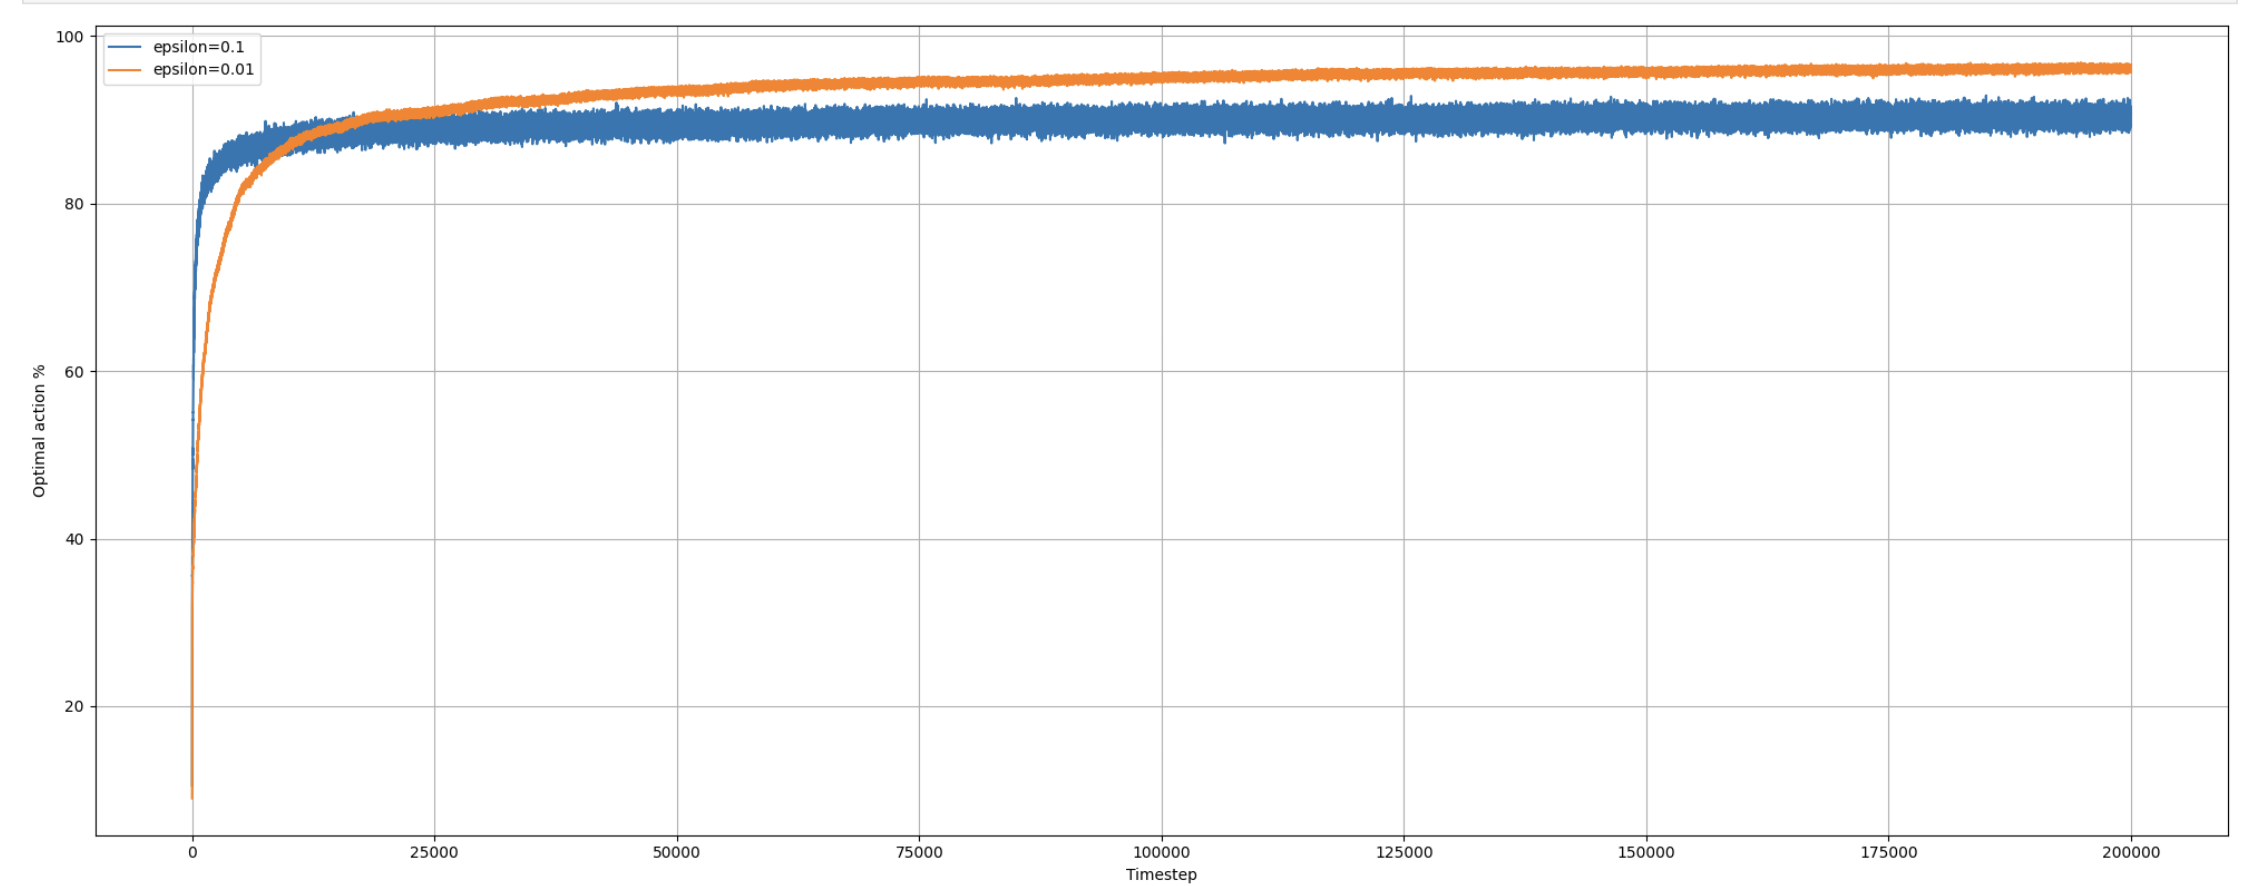


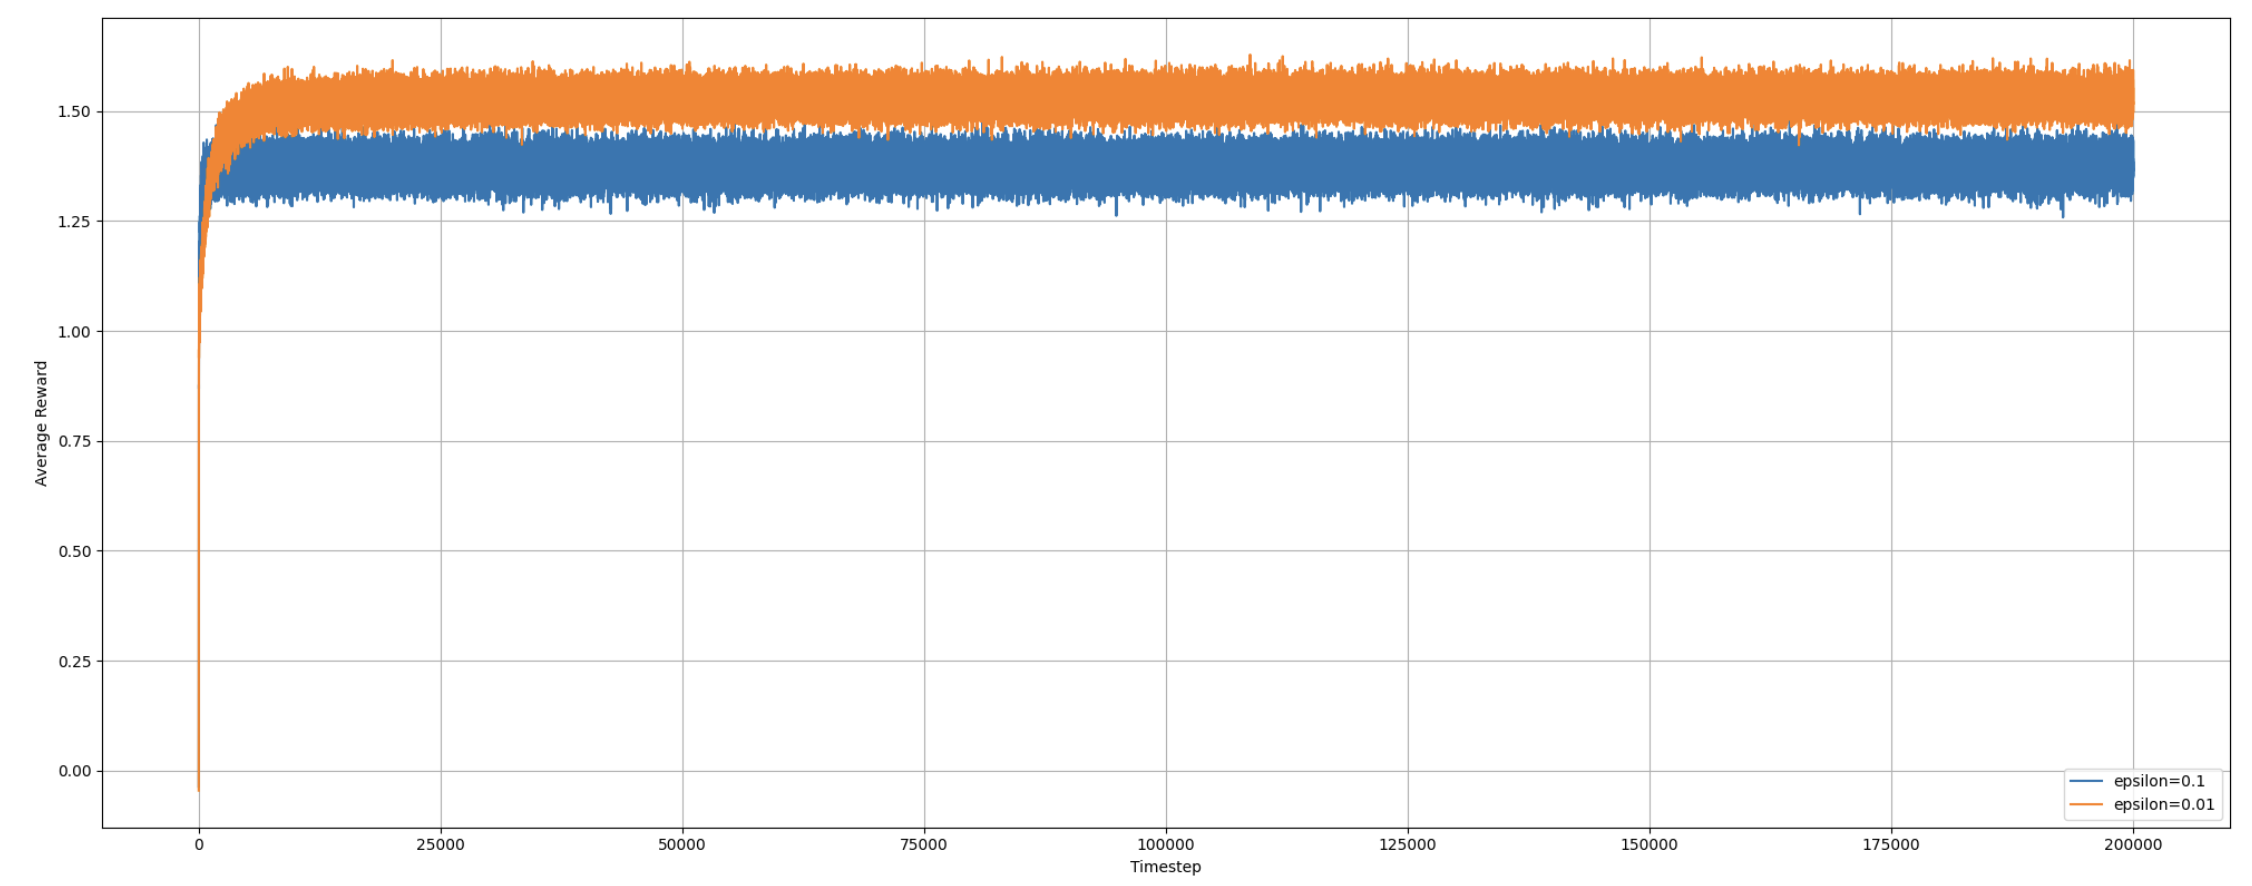



# 2. Action-Value Method: Exponential Recency Weighted Average

Sample-Average method as we have learned above, keeps track of all the rewards seen so far for an action and compute their average.

This method works great in stationary environment (where underlying reward distribution is stable meaning reward probabilities do not change over time).

Example: slot machine that give 70% chance of winning $1 always.If the machine never changes, then average of all the past outcomes gives us a reliable estimate.


Problem arises when the environment is non-stationary i.e when things change over time.

Example:
 - A user's behavior changes
 - Machine's payout probabilities shift.

In those cases, old data becomes misleading but the sample average method gives equal weight to all the past rewards, even for the very old ones. Agent continues to take decisions based on the outdated information.


To solve this, we use a new idea. **Give more weight to the recent rewards and slowly forget the old ones**. This leads to constant step-size method, $Q_{n+1} = Q_n + \alpha \left( R_n - Q_n \right)$ where ⍺ is constant between 0 and 1.

- If we expand this equation further,
$$
\begin{aligned}
Q_{n+1} &= Q_n + \alpha \left[ R_n - Q_n \right] \\
        &= \alpha R_n + (1 - \alpha) Q_n \\
        &= \alpha R_n + (1 - \alpha) \left[ \alpha R_{n-1} + (1 - \alpha) Q_{n-1} \right] \\
        &= \alpha R_n + (1 - \alpha) \alpha R_{n-1} + (1 - \alpha)^2 Q_{n-1} \\
        &= \alpha R_n + (1 - \alpha) \alpha R_{n-1} + (1 - \alpha)^2 \alpha R_{n-2} + \cdots \\
        &\quad + (1 - \alpha)^{n-1} \alpha R_1 + (1 - \alpha)^n Q_1 \\
        &= (1 - \alpha)^n Q_1 + \sum_{i=1}^{n} \alpha (1 - \alpha)^{n - i} R_i
\end{aligned}
$$


- We call this a **weighted average** because the sum of the weights is 1.$(1 - \alpha)^n + \sum_{i=1}^{n} \alpha (1 - \alpha)^{n - i} = 1.$
  - Note that $(1-⍺)$ is less than 1. So $(1-⍺)^{n-i}$ values decreases as $(n-i)$ increases. Meaning, older the reward, less weight is given to it.
- Weight decays exponentially according to the exponent on $(1-⍺)$
- Hence we call this method as **exponential recency-weighted average** method.

## Convergence Theory

To guarantee convergence (only for stationary problems), below equations must hold true:

$$\sum \alpha_n = \infty$$ $$\sum \alpha_n^2 < \infty $$


- These are true for $⍺_n = \frac{1}{n}$ (sample-average method)
- Not true for constant $α$ (nonstationary method)

Which is fine! Because in nonstationary problems, we don’t want convergence — we want to keep adapting!


## Exercise 2.4

If the step-size parameters, $⍺_n$, are not constant, then the estimate Qn is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

By recursive expansion (similar to equation 2.6), the estimate becomes:

$$
Q_{n+1} = (1 - \alpha_n) Q_n + \alpha_n R_n
$$

Substitute $Q_n$ recursively:

$$
Q_n = (1 - \alpha_{n-1}) Q_{n-1} + \alpha_{n-1} R_{n-1}
$$

Keep expanding until $Q_1$, you'll get:

$$
Q_{n+1} = \left( \prod_{j=1}^{n} (1 - \alpha_j) \right) Q_1 + \sum_{i=1}^{n} \left[ \alpha_i \prod_{j=i+1}^{n} (1 - \alpha_j) \right] R_i
$$


## Exercise 2.5

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, ⍺ = 0.1. Use ε = 0.1 andlonger runs, say of 10000 steps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
k = 10 ## 10-armed bandit
# true_values = np.random.normal(loc=0, scale=1.0, size=k)

def run_simulation_v2(epsilon, timesteps, const_step_size=0, step_size=0.1, non_stationary=1):

  true_values = np.ones(k)
  optimal_action = np.argmax(true_values)

  # Initialization
  Q = np.zeros(k)  # estimate values Q_t(a)
  N = np.zeros(k)  # number of times each action was selected
  rewards = np.zeros(timesteps)    # reward at each timestep
  optimal_action_selected = np.zeros(timesteps)

  for timestep in range(timesteps):
    # choose an action (ε-greedy)
    if np.random.rand() < epsilon: ## Exploration - Random selection
      action = np.random.choice(k)
    else: ## Exploitation - Greedy
      max_q = np.max(Q)
      best_actions = np.where(Q == max_q)[0] ## break ties randomly
      action = np.random.choice(best_actions)

    # simulate reward from bandit
    reward = np.random.normal(loc=true_values[action], scale=1.0)
    rewards[timestep] = reward
    optimal_action_selected[timestep] = (action == optimal_action)

    # update the estimates
    if const_step_size:
      Q[action] += step_size*(reward-Q[action])
    else:
      N[action] += 1
      Q[action] += (reward-Q[action])/N[action]

    ## non-stationary environment
    if non_stationary:
      for action in range(k):
        true_values[action] += np.random.normal(loc=0, scale=0.01)

  return rewards, optimal_action_selected


def run_multiple_simulations_v2(epsilon, timesteps, num_simulations, const_step_size=0):
  all_rewards = np.zeros((num_simulations, timesteps))
  all_optimal_actions = np.zeros((num_simulations, timesteps))
  for simulation in range(num_simulations):
    if simulation%100 == 0: print(f"Simulation:{simulation}")
    all_rewards[simulation], all_optimal_actions[simulation] = run_simulation_v2(epsilon, timesteps, const_step_size)

  # calculate avg across simulations for each timestep
  avg_rewards = np.mean(all_rewards, axis=0)
  avg_optimal_actions = np.mean(all_optimal_actions, axis=0)*100
  return avg_rewards, avg_optimal_actions

In [ ]:
sample_avg_method_rewards,a = run_multiple_simulations_v2(epsilon=0.1, timesteps=10000, num_simulations=2000, const_step_size=0)
exp_recency_weighted_avg_method_rewards,a = run_multiple_simulations_v2(epsilon=0.1, timesteps=10000, num_simulations=2000, const_step_size=1)

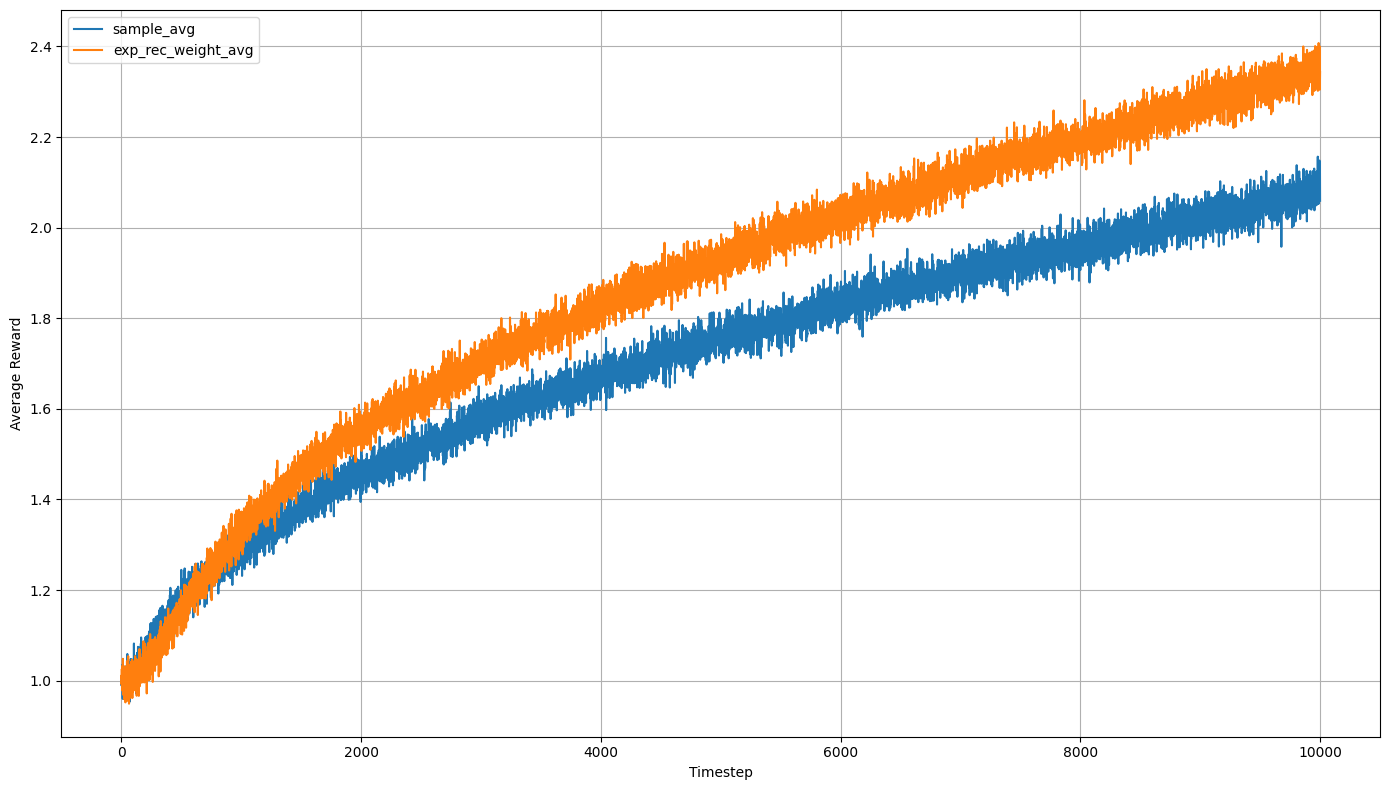

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(sample_avg_method_rewards, label='sample_avg')
plt.plot(exp_recency_weighted_avg_method_rewards, label='exp_rec_weight_avg')

plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

# Optimistic Initial Values - Exploration Technique

- **Purpose**:  
  Encourage exploration without using randomness (like ε-greedy).

- **How it works**:  
  Initialize all action-values $Q_1(a)$ to a **high number** (e.g., +5) instead of 0.

- **Why it helps**:  
  The agent becomes curious — it tries all actions because they *look good*, but updates them down when rewards are lower.

- **Behavior**:
  - Explores more in the beginning.
  - Becomes greedy naturally once value estimates settle.
  - Exploration **self-decays** over time.

- **Best for**:  
  **Stationary problems**, where the reward distributions do not change over time.

- **Not suitable for**:  
  **Nonstationary problems**, because once optimism fades, exploration stops.

- **Trade-off**:
  - Slower start (more exploration)
  - Better long-term performance (finds optimal actions)


## Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
# k = 10 ## 10-armed bandit
# true_values = np.random.normal(loc=0, scale=1.0, size=k)

def run_simulation_v3(epsilon, timesteps, init_q_value, k=10):
  step_size = 0.1
  true_values = np.random.normal(loc=0, scale=1.0, size=k)
  optimal_action = np.argmax(true_values)

  # Initialization
  Q = np.zeros(k)+init_q_value  # estimate values Q_t(a)
  N = np.zeros(k)  # number of times each action was selected
  rewards = np.zeros(timesteps)    # reward at each timestep
  optimal_action_selected = np.zeros(timesteps)

  for timestep in range(timesteps):
    # choose an action (ε-greedy)
    if np.random.rand() < epsilon: ## Exploration - Random selection
      action = np.random.choice(k)
    else: ## Exploitation - Greedy
      max_q = np.max(Q)
      best_actions = np.where(Q == max_q)[0] ## break ties randomly
      action = np.random.choice(best_actions)

    # simulate reward from bandit
    reward = np.random.normal(loc=true_values[action], scale=1.0)
    rewards[timestep] = reward
    optimal_action_selected[timestep] = (action == optimal_action)

    # update the estimates
    Q[action] += step_size*(reward-Q[action])

  return rewards, optimal_action_selected


def run_multiple_simulations_v3(epsilon, timesteps, num_simulations, init_q, k=10):
  all_rewards = np.zeros((num_simulations, timesteps))
  all_optimal_actions = np.zeros((num_simulations, timesteps))
  for simulation in range(num_simulations):
    # if simulation%100 == 0: print(f"Simulation-:{simulation}")
    all_rewards[simulation], all_optimal_actions[simulation] = run_simulation_v3(epsilon, timesteps, init_q, k)

  # calculate avg across simulations for each timestep
  avg_rewards = np.mean(all_rewards, axis=0)
  avg_optimal_actions = np.mean(all_optimal_actions, axis=0)*100
  return avg_rewards, avg_optimal_actions

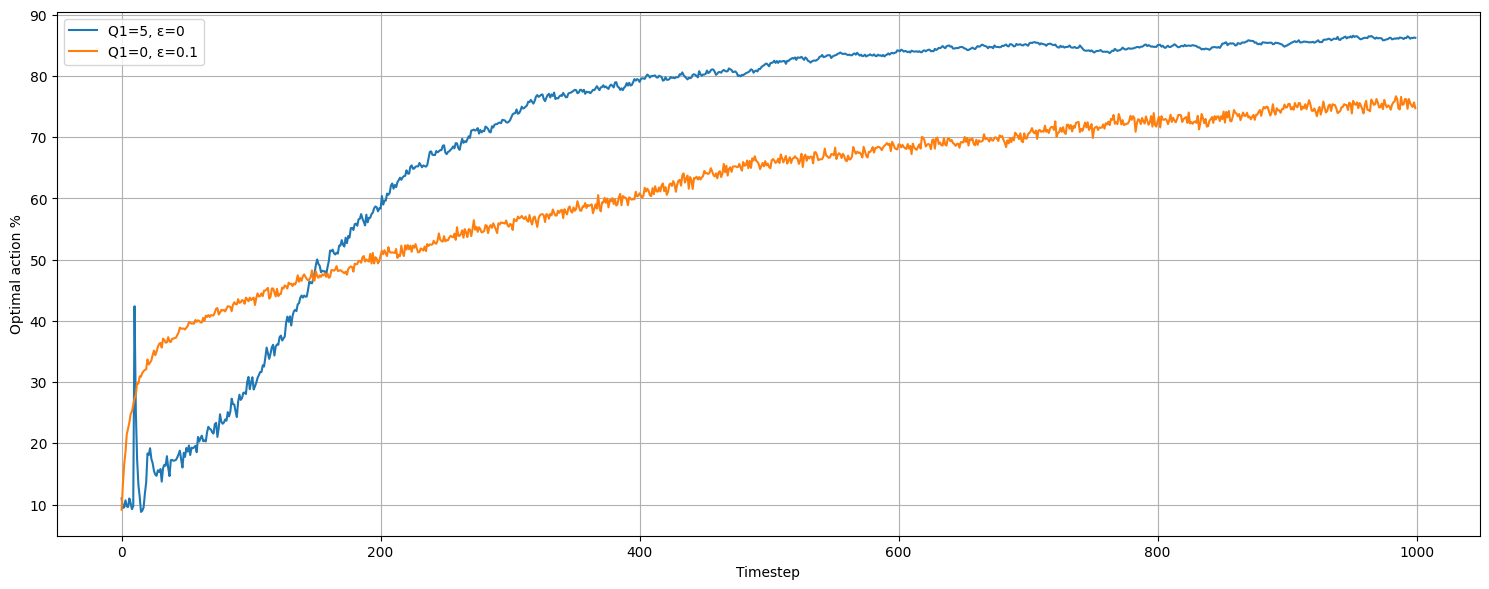

In [ ]:
a, init_5_epsilon_0 = run_multiple_simulations_v3(0, 1000, 2000, 5)
a, init_0_epsilon_01 = run_multiple_simulations_v3(0.1, 1000, 2000, 0)

plt.figure(figsize=(15, 6))
plt.plot(init_5_epsilon_0, label='Q1=5, ε=0')
plt.plot(init_0_epsilon_01, label='Q1=0, ε=0.1')

plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

## few experiments to understand the spike

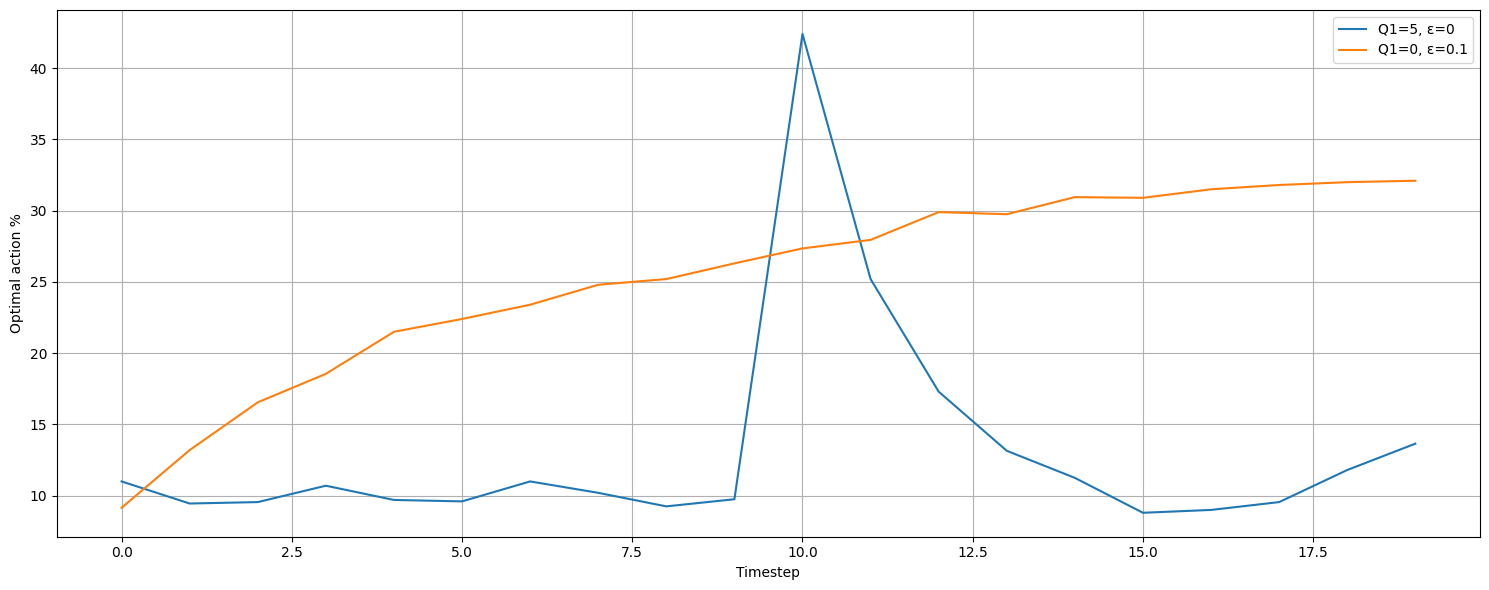

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(init_5_epsilon_0[0:20], label='Q1=5, ε=0')
plt.plot(init_0_epsilon_01[0:20], label='Q1=0, ε=0.1')

plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

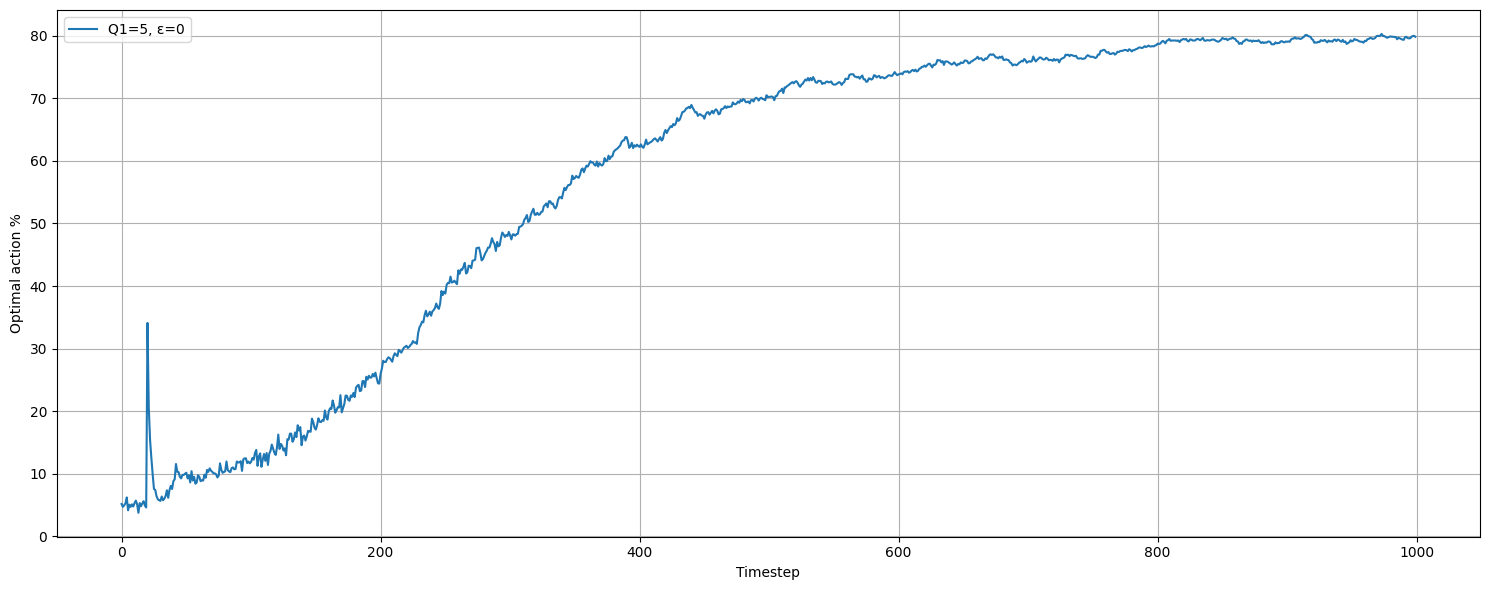

In [ ]:
a, init_5_epsilon_0_k20 = run_multiple_simulations_v3(0, 1000, 2000, 5, 20)

plt.figure(figsize=(15, 6))
plt.plot(init_5_epsilon_0_k20, label='Q1=5, ε=0')
plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

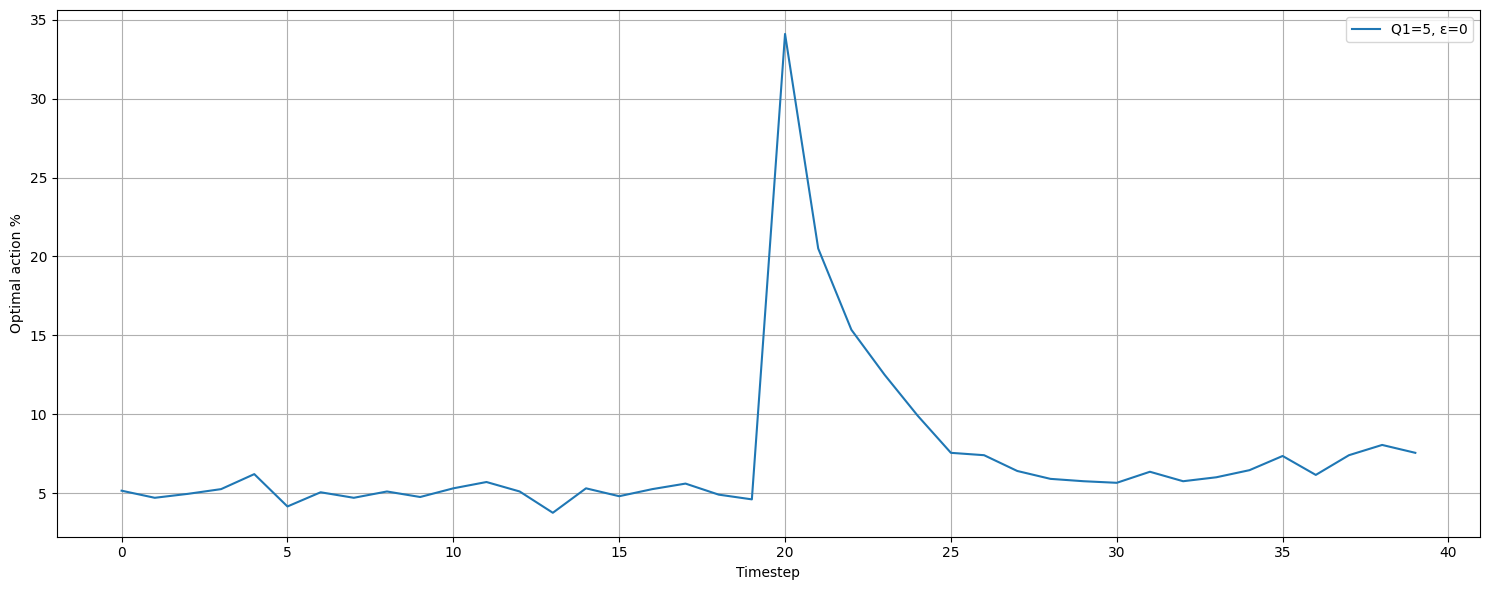

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(init_5_epsilon_0_k20[0:40], label='Q1=5, ε=0')
plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

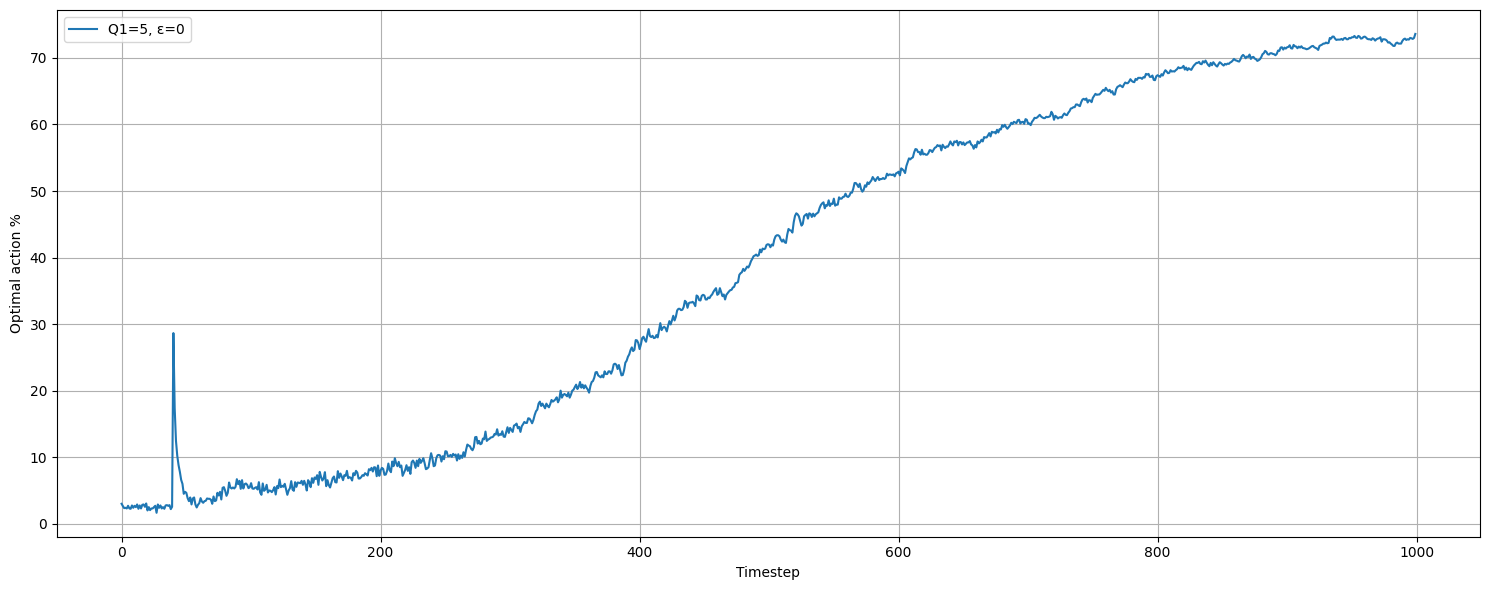

In [ ]:
a, init_5_epsilon_0_k40 = run_multiple_simulations_v3(0, 1000, 2000, 5, 40)

plt.figure(figsize=(15, 6))
plt.plot(init_5_epsilon_0_k40, label='Q1=5, ε=0')
plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

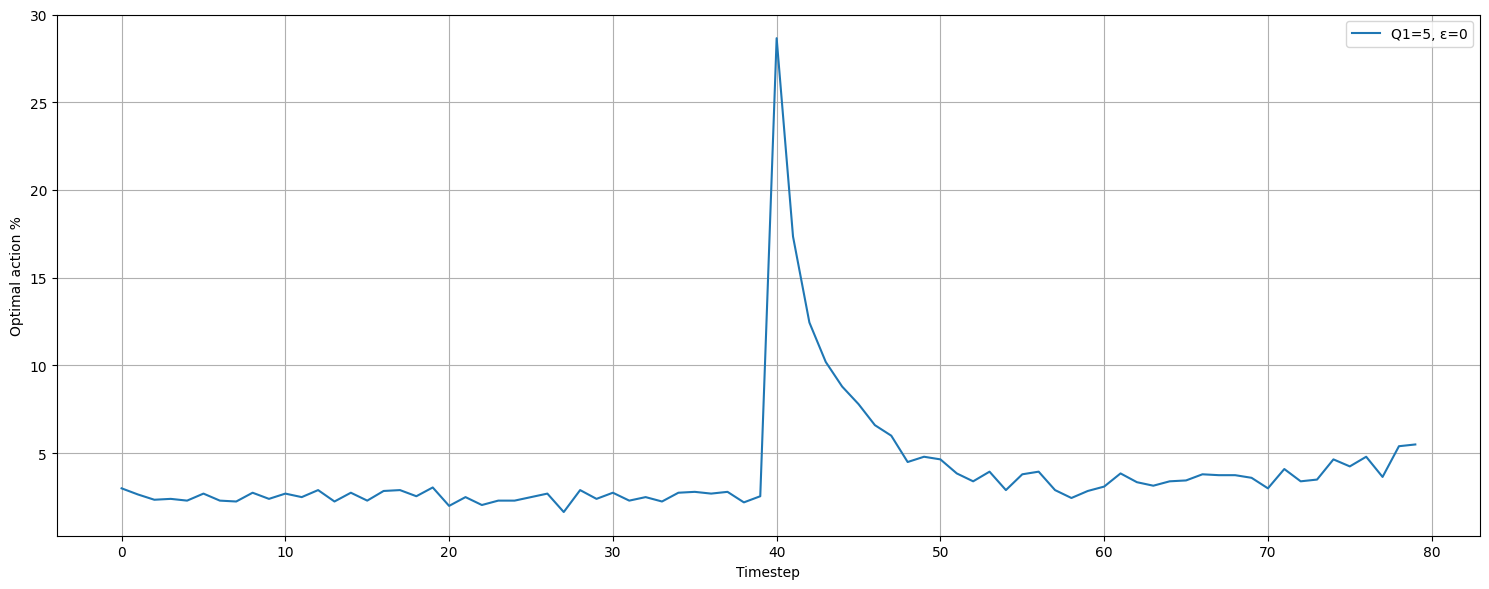

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(init_5_epsilon_0_k40[0:80], label='Q1=5, ε=0')
plt.xlabel('Timestep')
plt.ylabel('Optimal action %')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

## Understanding Spike (at timestep-k) followed by drop and then steady rise

### Why the spike happens at **step $k$**:
1. The agent starts with **optimistic Q-values** (e.g., Q = 5).
2. From **step 0 to $k-1$**, it tries each action **once**.
3. After trying all actions, their Q-values differ based on observed rewards.
4. At **step $k$**, the agent **picks the action with the highest Q** — usually the **optimal one**.
5. This causes a **spike in % optimal action** at **step $k$**.


### Why there’s a **drop** after the spike:
6. Some suboptimal actions may still have **high Q-values** (due to early lucky rewards).
7. The agent may pick one of those next, **thinking it’s better**.
8. So **% optimal action drops temporarily**.


### Why there’s a **steady rise** after that:
9. With more feedback, **Q-values for bad actions drop**.
10. The optimal action gives **consistently better rewards**, so its Q stays highest.
11. The agent **commits to the optimal action**.
12. **% optimal action rises and stabilizes**.

### Easy to remember:

> **Try all → pick best → get tricked → recover → stick to best**


## Exercise 2.6: Mysterious Spikes

The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?


### Answer – Why the Spikes Appear at Specific Early Steps

- Although the graph shows an average over 2000 runs, many of those runs behave very similarly during the early steps.

- The optimistic method sets all initial Q-values high (e.g., Q = 5), and uses a greedy strategy (ε = 0). That means the agent explores by trying **each action once**, expecting high rewards.

- After each action is tried and gets a lower-than-expected reward, its Q-value drops. The agent moves on to the next untried action, which still looks “optimistic.”

- By **step \( k+1 \)** (for a \( k \)-armed bandit), most agents have now tried all actions once. They choose the one with the highest estimated value — which is often the optimal one — resulting in a **sharp spike in % optimal action**.

- But randomness in rewards can trick some agents into thinking a suboptimal action is better (e.g., due to lucky high reward). So the % optimal action **drops briefly** after the spike.

- Over time, as more feedback is collected, Q-values settle. The optimal action consistently provides better returns, so the agent starts choosing it more reliably again — leading to a **steady rise** in optimal action selection.

- These behaviors (try-all → spike → tricked → recovery) happen consistently across many runs, which is why the early spikes and dips appear in the averaged curve — they are not just noise.

---

### Summary to Remember:
> Structured early exploration across all agents leads to similar turning points.  
> That’s why we see the spike at step \( k+1 \), a small dip, and a gradual climb in performance.


## why constant step size method always have initial bias

- Formula:
$$
Q_{n+1} = Q_n + \alpha (R_n - Q_n), \quad \text{where } 0 < \alpha \leq 1
$$

- By recursively substituting $Q_n$, we get:

$$
Q_{n+1} = (1 - \alpha)^n Q_1 + \sum_{i=1}^{n} \alpha (1 - \alpha)^{n - i} R_i
$$

- Here, older rewards are discounted exponentially, and the initial estimate $Q_1$ **never disappears entirely**.

- The weight given to $Q_1$ is: $(1 - \alpha)^n
$. This value **decreases slowly**, but **never becomes zero**.

- That means the **initial value continues to influence** the current estimate, even after many steps.

## Exercise 2.7: Unbiased Constant step size trick

In most of this chapter we have used sample averages to estimate action values because sample averages do not produce the initial bias that constant step sizes do (see the analysis leading to (2.6)). However, sample averages are not a completely satisfactory solution because they may perform poorly on nonstationary problems. Is it possible to avoid the bias of constant step sizes while retaining their advantages on nonstationary problems? One way is to use a step size of

$$
\beta_n \doteq \frac{\alpha}{\bar{o}_n},
$$

to process the $n$th reward for a particular action, where $\alpha > 0$ is a conventional constant step size, and $\bar{o}_n$ is a trace of one that starts at 0:

$$
\bar{o}_n \doteq \bar{o}_{n-1} + \alpha (1 - \bar{o}_{n-1}), \quad \text{for } n > 0, \quad \text{with } \bar{o}_0 \doteq 0.
$$

Carry out an analysis like that in (2.6) to show that $Q_n$ is an exponential recency-weighted average *without initial bias*.

---
[Solution]


We start with the update rule:

$$
Q_{n+1} = Q_n + \frac{\alpha}{\bar{o}_n}(R_n - Q_n)
$$

Let:

$$
\beta_n = \frac{\alpha}{\bar{o}_n}
$$

Then the update becomes:

$$
Q_{n+1} = Q_n + \beta_n (R_n - Q_n)
$$

Expanding this recursively:

$$
Q_{n+1} = \left( \prod_{j=1}^n (1 - \beta_j) \right) Q_1 + \sum_{i=1}^n \left[ \beta_i \prod_{j=i+1}^n (1 - \beta_j) \right] R_i
$$

But note that:

- At $n = 1$, $\bar{o}_1 = \alpha \Rightarrow \beta_1 = \frac{\alpha}{\alpha} = 1$
- Hence, $1 - \beta_1 = 0$
- So the term involving $Q_1$ is multiplied by zero and vanishes

Thus, the final unbiased form becomes:

$$
Q_{n+1} = \sum_{i=1}^n \left[ \beta_i \prod_{j=i+1}^n (1 - \beta_j) \right] R_i
$$

This is an **exponential recency-weighted average** of the rewards **without initial bias**, since the initial estimate $Q_1$ has no influence on the final result.
